# IMPORT 

In [1]:
import qcodes as qc
from qcodes.dataset import (
    ArraySweep,
    LinSweep,
    LogSweep,
    Measurement,
    
    TogetherSweep,
    do1d,
    do2d,
    dond,
    initialise_or_create_database_at,
    load_or_create_experiment,
    plot_dataset,
    load_by_id
)

from qcodes.parameters import Parameter
import numpy as np

from qcodes.dataset.plotting import plot_dataset, plot_by_id

In [2]:
# Loading database
qc.initialise_or_create_database_at("Fig2_Lakic2024.db")
exp = qc.load_or_create_experiment(
    experiment_name="DDsuperDD",
    sample_name="2_443QT_Freundschaft.mk2"
)

## Fig 2a 

<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mjx381\AppData\Local\Temp\ipykernel_6664\1003577062.py:42: SyntaxWarning: invalid escape sequence '\m'
  plt.colorbar(label="${\mathrm{G}}$ $(e^2/h)$")


(-1.42, -1.365)

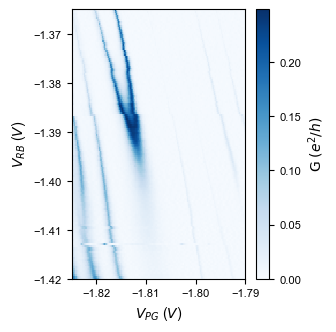

In [3]:
#Fig 2 a)
# LB = -1.1079999999999999 , HG = -1 , Vsd = 80uV

ds = load_by_id(1) # ID in .db

x_label = ds.get_parameters()[1].label
y_label = ds.get_parameters()[0].label
z_label = ds.get_parameters()[3].label
data_xarray_1 = ds.to_xarray_dataset()


# Computing conductance

b = data_xarray_1.qdac1_SRP
c = data_xarray_1.qdac1_SRBT
bias = 2.5e-6 # lockin excitation
current =  data_xarray_1.lockin1_R * 1e-7
esquared_over_h = (7.74809173e-5)
Rfilter = 2.7e3 # Ohm
diffG = 1/(bias / current - Rfilter)/ esquared_over_h

# Recasting parameters to numpy

VRB = c.to_numpy()
VLB = b.to_numpy()
G = diffG.to_numpy()

# Plotting

import matplotlib.pylab as plt
params = {'font.family': 'arial',
          'legend.fontsize': 14,
          'figure.figsize': (2.8,3.5),
          'axes.labelsize': 10,
          'axes.titlesize': 10,
          'xtick.labelsize':8,
          'ytick.labelsize':8}
plt.rcParams.update(params)
plt.rcParams['pdf.fonttype'] = 42

plt.imshow(diffG,aspect='auto',origin='lower', vmin = 0, vmax = np.max(diffG), extent =[np.min(b),np.max(b),np.min(c),np.max(c)], cmap='Blues',interpolation='none')
plt.colorbar(label="${\mathrm{G}}$ $(e^2/h)$")
plt.ylabel('$V_{RB}$ ($V$)')
plt.xlabel('$V_{PG}$ ($V$)')
plt.ylim([-1.42,-1.365])


# Fig 2b 

<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mjx381\AppData\Local\Temp\ipykernel_6664\1664009022.py:35: SyntaxWarning: invalid escape sequence '\m'
  plt.colorbar(label="${\mathrm{G}}$ $(e^2/h)$")
C:\Users\mjx381\AppData\Local\Temp\ipykernel_6664\1664009022.py:36: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('V$_{SD}$ ($\mu$V)')


(-1.816, -1.805)

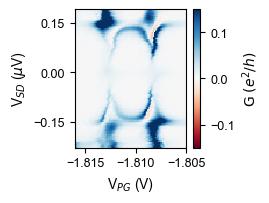

In [4]:
# Fig 2 b)
# LB = -1.108 , RB = -1.372, HG = -1 , Vsd = 80uV

ds = load_by_id(2) # ID in .db
x_label = ds.get_parameters()[1].label
y_label = ds.get_parameters()[0].label
z_label = ds.get_parameters()[3].label
data_xarray_1 = ds.to_xarray_dataset()



# Computing Conductance

b = data_xarray_1.qdac1_SRP
c = data_xarray_1.qdac1_OTR*1e3-0.018 # corrected for 18uV bias offset from QDAC
bias = 2.5e-6 # lockin excitation
current =  data_xarray_1.lockin1_X * 1e-7
esquared_over_h = (7.74809173e-5)
Rfilter = 2.7e3 # Ohm
diffG = 1/(bias / current - Rfilter)/ esquared_over_h

# Plotting

import matplotlib.pylab as plt
params = {'legend.fontsize': 14,
          'figure.figsize': (1.8,1.8),
          'axes.labelsize': 10,
          'axes.titlesize': 10,
          'xtick.labelsize':9,
          'ytick.labelsize':9}
plt.rcParams.update(params)
plt.rcParams['pdf.fonttype'] = 42

plt.imshow(diffG,aspect='auto',origin='lower', vmin = -0.15, vmax = 0.15, extent =[np.min(b),np.max(b),np.min(c),np.max(c)], cmap='RdBu',interpolation='none')
plt.colorbar(label="${\mathrm{G}}$ $(e^2/h)$")
plt.ylabel('V$_{SD}$ ($\mu$V)')
plt.xlabel('V$_{PG}$ (V)')
plt.yticks([-0.150,0,0.150])
plt.xlim([-1.816,-1.805])


# Fig 2c 

<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mjx381\AppData\Local\Temp\ipykernel_6664\2801099010.py:35: SyntaxWarning: invalid escape sequence '\m'
  plt.colorbar(label="${\mathrm{G}}$ $(e^2/h)$")
C:\Users\mjx381\AppData\Local\Temp\ipykernel_6664\2801099010.py:36: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('V$_{SD}$ ($\mu$V)')


(-1.8134, -1.801)

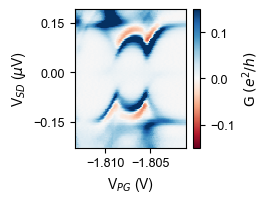

In [5]:
# Fig. 2 c)
# LB = -1.1079999999999999 , RB = -1.385 HG = -1 , Vsd = 80uV

ds = load_by_id(3) # ID in database
x_label = ds.get_parameters()[1].label
y_label = ds.get_parameters()[0].label
z_label = ds.get_parameters()[3].label
data_xarray_1 = ds.to_xarray_dataset()

#  Computing conductance

b = data_xarray_1.qdac1_SRP
c = data_xarray_1.qdac1_OTR*1e3-0.018 # Corrected for 18uV bias offset from QDAC
bias = 2.5e-6 # Lockin excitation
current =  data_xarray_1.lockin1_X * 1e-7
esquared_over_h = (7.74809173e-5)
Rfilter = 2.7e3 # Ohm
diffG = 1/(bias / current - Rfilter)/ esquared_over_h


# Plotting 

import matplotlib.pylab as plt
params = {'legend.fontsize': 14,
          'figure.figsize': (1.8,1.8),
          'axes.labelsize': 10,
          'axes.titlesize': 10,
          'xtick.labelsize':9,
          'ytick.labelsize':9}
plt.rcParams.update(params)
plt.rcParams['pdf.fonttype'] = 42


plt.imshow(diffG,aspect='auto',origin='lower', vmin = -0.15, vmax = 0.15, extent =[np.min(b),np.max(b),np.min(c),np.max(c)],cmap='RdBu',interpolation='none')
plt.colorbar(label="${\mathrm{G}}$ $(e^2/h)$")
plt.ylabel('V$_{SD}$ ($\mu$V)')
plt.xlabel('V$_{PG}$ (V)')
plt.yticks([-0.150,0,0.150])
plt.xlim([-1.8134,-1.801])

# Fig 2d

<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mjx381\AppData\Local\Temp\ipykernel_6664\1132497713.py:34: SyntaxWarning: invalid escape sequence '\m'
  plt.colorbar(label="${\mathrm{G}}$ $(e^2/h)$")
C:\Users\mjx381\AppData\Local\Temp\ipykernel_6664\1132497713.py:35: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('V$_{SD}$ ($\mu$V)')


(-1.8105, -1.8)

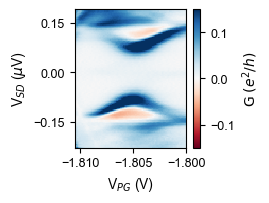

In [7]:
# Fig. 2 d)
# LB = -1.1079999999999999 , RB = -1.4025 HG = -1 , Vsd = 80uV

ds = load_by_id(4) # ID in .db
x_label = ds.get_parameters()[1].label
y_label = ds.get_parameters()[0].label
z_label = ds.get_parameters()[3].label
data_xarray_1 = ds.to_xarray_dataset()

# Computing conductance

b = data_xarray_1.qdac1_SRP
c = data_xarray_1.qdac1_OTR*1e3-0.018 # corrected for 18uV bias offset from QDAC
bias = 2.5e-6 # Lockin excitaion
current =  data_xarray_1.lockin1_X * 1e-7
esquared_over_h = (7.74809173e-5)
Rfilter = 2.7e3 # Ohm
diffG = 1/(bias / current - Rfilter)/ esquared_over_h

# Plotting

import matplotlib.pylab as plt
params = {'legend.fontsize': 14,
          'figure.figsize': (1.8,1.8),
          'axes.labelsize': 10,
          'axes.titlesize': 10,
          'xtick.labelsize':9,
          'ytick.labelsize':9}
plt.rcParams.update(params)
plt.rcParams['pdf.fonttype'] = 42


plt.imshow(diffG,aspect='auto',origin='lower', vmin = -0.15, vmax = 0.15, extent =[np.min(b),np.max(b),np.min(c),np.max(c)],cmap='RdBu',interpolation='none')
plt.colorbar(label="${\mathrm{G}}$ $(e^2/h)$")
plt.ylabel('V$_{SD}$ ($\mu$V)')
plt.xlabel('V$_{PG}$ (V)')
plt.yticks([-0.150,0,0.150])
plt.xticks([-1.810,-1.805,-1.80])
plt.xlim([-1.8105,-1.80])
